<a href="https://colab.research.google.com/github/MuhammadSaadKhan1100/Data_Science/blob/main/TF_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing packages:**

In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

%matplotlib inline

**Now Reading CSV file using pandas as pd**

**Making datetime column as index of our dataframe**

In [9]:
Weather_df = pd.read_csv('Weather.csv',parse_dates=['date_time'], index_col='date_time')
Weather_df.head(5)

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,24.0,10.0,0.0,8.7,4.0,1.0,31.0,9:56 AM,9:45 PM,6:57 AM,...,11.0,21.0,17.0,50.0,0.0,1015.0,11.0,10.0,320.0,10.0
2009-01-01 01:00:00,24.0,10.0,0.0,8.7,4.0,1.0,31.0,9:56 AM,9:45 PM,6:57 AM,...,12.0,22.0,11.0,52.0,0.0,1015.0,11.0,10.0,315.0,11.0
2009-01-01 02:00:00,24.0,10.0,0.0,8.7,4.0,1.0,31.0,9:56 AM,9:45 PM,6:57 AM,...,12.0,23.0,6.0,55.0,0.0,1015.0,11.0,10.0,310.0,11.0
2009-01-01 03:00:00,24.0,10.0,0.0,8.7,4.0,1.0,31.0,9:56 AM,9:45 PM,6:57 AM,...,12.0,23.0,0.0,57.0,0.0,1015.0,10.0,10.0,304.0,12.0
2009-01-01 04:00:00,24.0,10.0,0.0,8.7,4.0,1.0,31.0,9:56 AM,9:45 PM,6:57 AM,...,14.0,19.0,0.0,54.0,0.0,1016.0,11.0,10.0,302.0,11.0


# *Now checking columns in our dataframe*





In [10]:
 Weather_df.columns

Index(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

# **Shape of current dataframe:**

In [12]:
Weather_df.shape

(9788, 24)

In [13]:
Weather_df.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,9787.000000,9787.000000,9787.0,9787.000000,9787.000000,9787.000000,9787.000000,9787.000000,9787.000000,9787.000000,9787.000000,9787.000000,9787.000000,9787.000000,9787.000000,9787.000000,9787.000000,9787.000000,9787.000000,9787.000000
mean,32.556350,20.020231,0.0,10.791785,6.444876,4.316542,46.479616,13.340656,29.507919,29.673036,27.648309,13.489731,15.260652,50.176663,0.031470,1006.959947,25.641565,9.641974,215.666292,8.787780
std,7.303511,7.722555,0.0,2.240469,1.570309,3.308440,31.133082,8.712828,10.012715,9.887988,8.375643,6.450441,23.028936,26.326224,0.260446,7.855196,8.816165,1.434284,102.462632,4.280983
min,16.000000,6.000000,0.0,4.300000,4.000000,1.000000,0.000000,-14.000000,9.000000,9.000000,9.000000,0.000000,0.000000,2.000000,0.000000,990.000000,6.000000,0.000000,0.000000,0.000000
25%,26.000000,13.000000,0.0,8.700000,5.000000,1.000000,19.000000,7.000000,21.000000,22.000000,21.000000,9.000000,0.000000,28.000000,0.000000,1000.000000,19.000000,10.000000,109.000000,6.000000
50%,31.000000,20.000000,0.0,11.600000,6.000000,5.000000,46.000000,11.000000,29.000000,29.000000,28.000000,13.000000,4.000000,50.000000,0.000000,1007.000000,26.000000,10.000000,260.000000,8.000000
75%,37.000000,26.000000,0.0,13.000000,8.000000,7.000000,73.000000,22.000000,37.000000,37.000000,33.000000,18.000000,22.000000,73.000000,0.000000,1014.000000,32.000000,10.000000,299.000000,11.000000
max,48.000000,35.000000,0.0,13.900000,10.000000,11.000000,100.000000,31.000000,58.000000,58.000000,50.000000,41.000000,100.000000,99.000000,7.000000,1024.000000,48.000000,10.000000,360.000000,30.000000


# **Checking if NUll value present in our dataset**

In [14]:
Weather_df.isnull().any()

maxtempC             True
mintempC             True
totalSnow_cm         True
sunHour              True
uvIndex              True
uvIndex.1            True
moon_illumination    True
moonrise             True
moonset              True
sunrise              True
sunset               True
DewPointC            True
FeelsLikeC           True
HeatIndexC           True
WindChillC           True
WindGustKmph         True
cloudcover           True
humidity             True
precipMM             True
pressure             True
tempC                True
visibility           True
winddirDegree        True
windspeedKmph        True
dtype: bool

# **Now Seperating feature what is to be predicted; Temperature in our case so we could predict weather. Weather_x stores the rest of the dataset while Weather_y has temperature column.**

In [15]:
Weather_df_num=Weather_df.loc[:,['maxtempC','mintempC','cloudcover','humidity','tempC', 'sunHour','HeatIndexC', 'precipMM', 'pressure','windspeedKmph']]
Weather_df_num.head()

,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,windspeedKmph
date_time,,,,,,,,,,
2009-01-01 00:00:00,24.0,10.0,17.0,50.0,11.0,8.7,12.0,0.0,1015.0,10.0
2009-01-01 01:00:00,24.0,10.0,11.0,52.0,11.0,8.7,13.0,0.0,1015.0,11.0
2009-01-01 02:00:00,24.0,10.0,6.0,55.0,11.0,8.7,13.0,0.0,1015.0,11.0
2009-01-01 03:00:00,24.0,10.0,0.0,57.0,10.0,8.7,13.0,0.0,1015.0,12.0
2009-01-01 04:00:00,24.0,10.0,0.0,54.0,11.0,8.7,14.0,0.0,1016.0,11.0


# **Now checking shape of new dataframe after changinings**

In [16]:
Weather_df_num.shape

(9788, 10)

# **Repeating checking of columns for new dataframe**

In [18]:
Weather_df_num.columns

Index(['maxtempC', 'mintempC', 'cloudcover', 'humidity', 'tempC', 'sunHour',
       'HeatIndexC', 'precipMM', 'pressure', 'windspeedKmph'],
      dtype='object')

# **Now we want to basically train our data therefore we have to pass graph plots of weather changes overall and for one year. Similarly we are to provide histograms for accuracy of our training. Finally we will feed this whole chunk of data to our system. **

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ae8bb2610>,
      dtype=object)

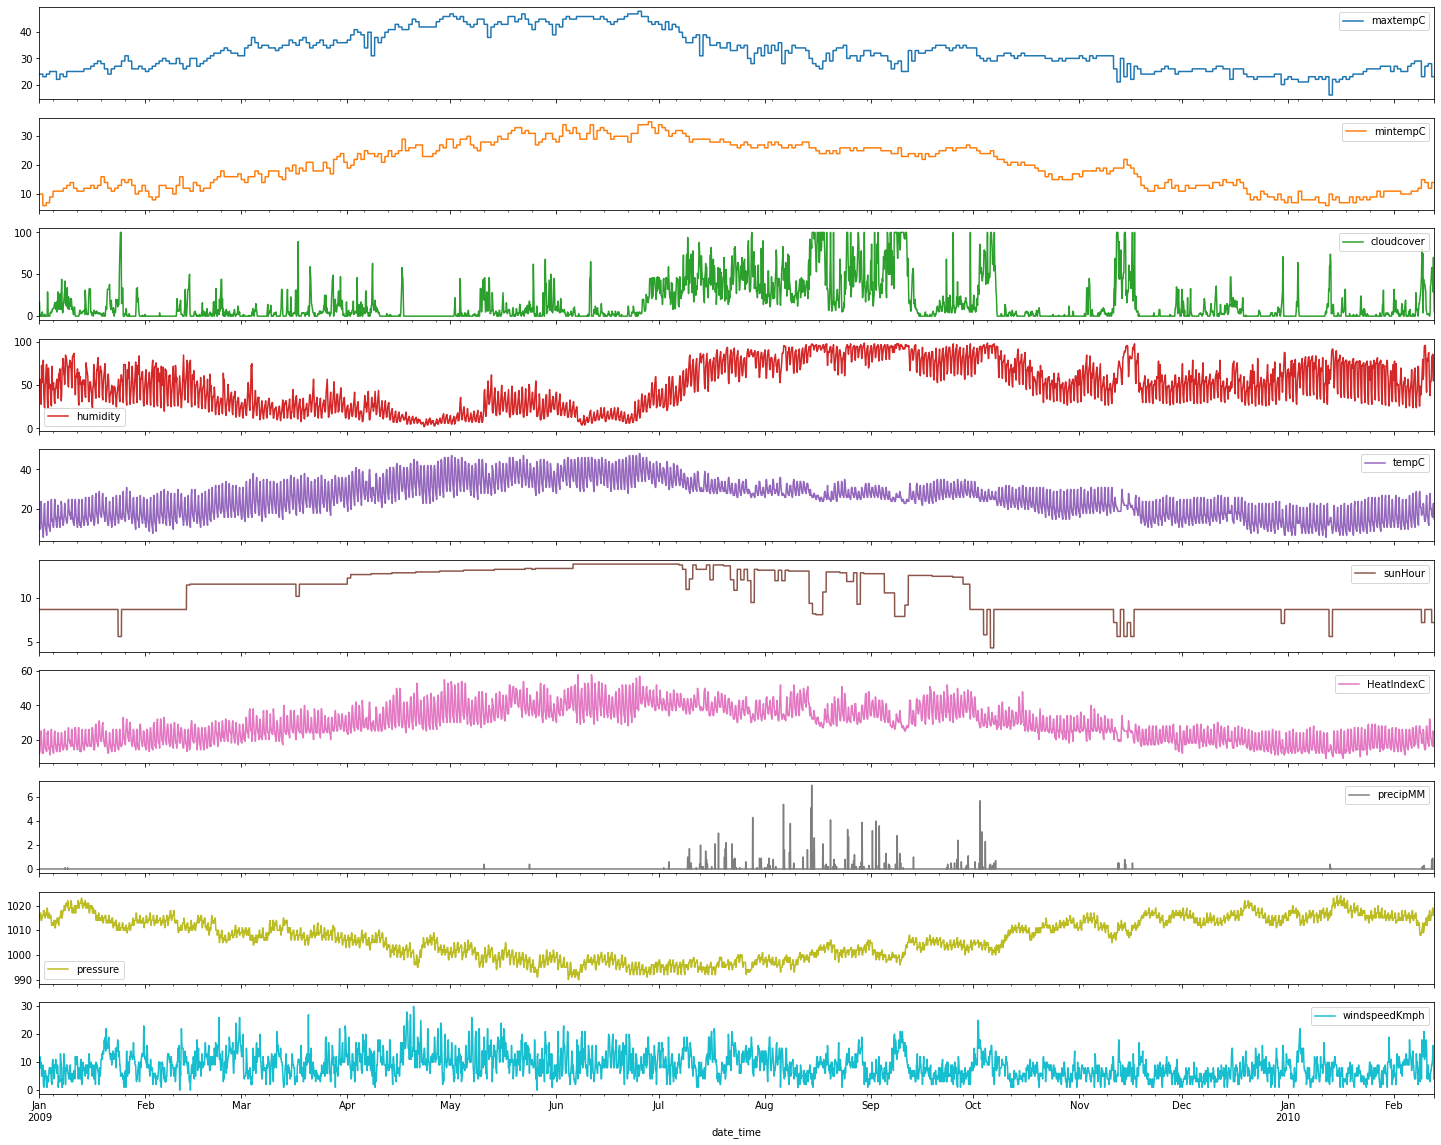

In [20]:
Weather_df_num.plot(subplots=True, figsize=(25,20))

# **Now for one year**

ValueError: ignored

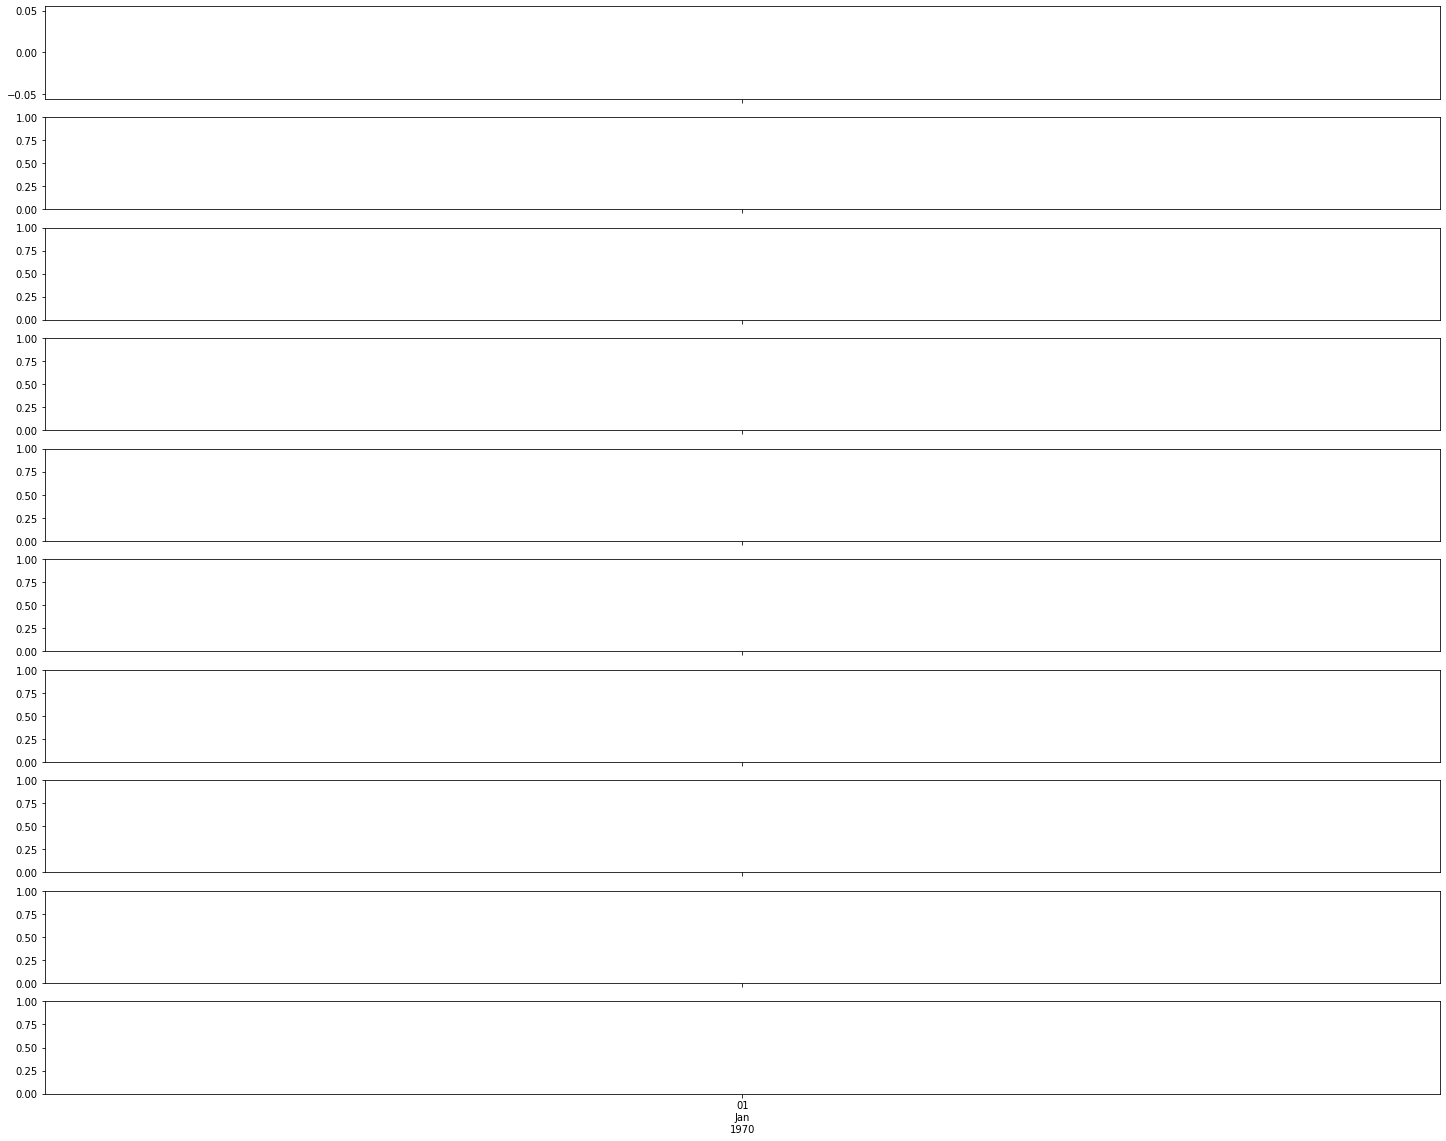

In [21]:
Weather_df_num['2019':'2020'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(25,20))

# **Now we are plotting Histograms:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ae5920580>,
      dtype=object)

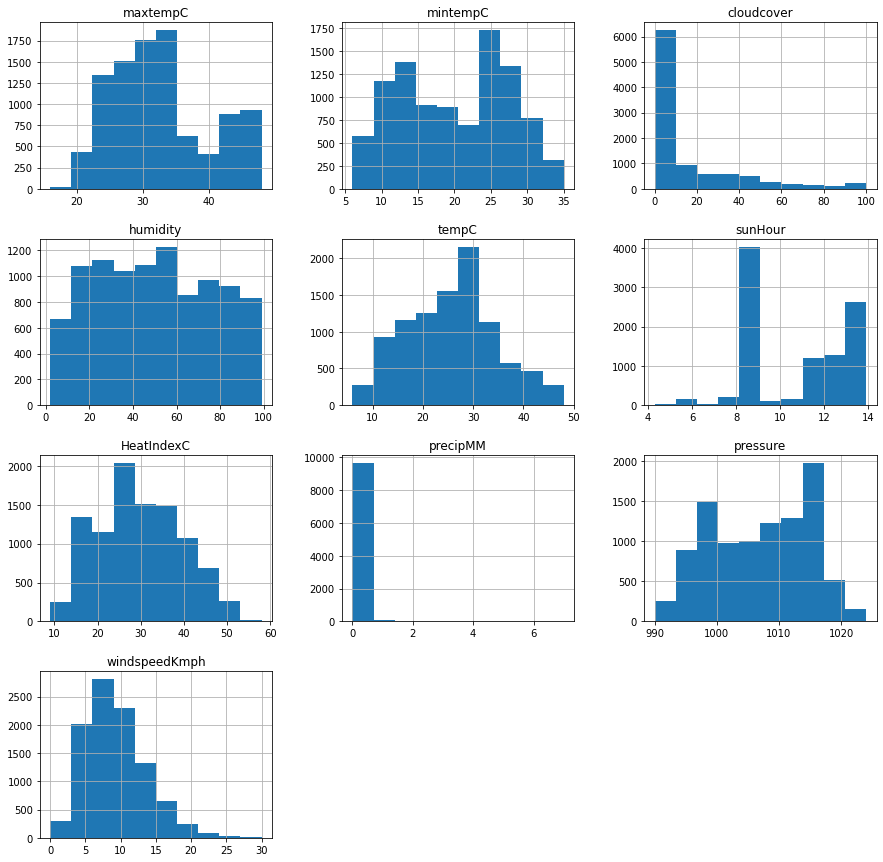

In [22]:
Weather_df_num.hist(bins=10,figsize=(15,15))

# **Histograms for one year:**

In [23]:
weth=Weather_df_num['2019':'2020']
weth.head()

,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,windspeedKmph
date_time,,,,,,,,,,


# **Weather_y = Temperature based**
# **Weather_x = Rest of the data**

In [24]:
Weather_y=Weather_df_num.pop("tempC")
Weather_x=Weather_df_num

😁 **Finally our Data is prepared and ready to be fed** 🍼 **for training(80%) and testing(20%)**

# **Now we will split our dataset for training and testing 💦**

In [26]:
train_X,test_X,train_y,test_y=train_test_split(Weather_x,Weather_y,test_size=0.2,random_state=4)

In [27]:
train_X.shape

(7830, 9)

In [29]:
train_y.shape

(7830,)

# ** 👀 Notice that our Weather_x has all the remaining data while Weather_y has only data of temperature(to which we are concerned). Train y has the corresponding temperature for features of Train x**

# **What we originally do in Machine learning? 🧲🔍m**
We first feed the model with input and it's associated output 📥 then test with another new input 📤.

In [30]:
train_y.head()

date_time
2009-05-13 10:00:00    41.0
2009-03-08 10:00:00    34.0
2009-03-20 07:00:00    30.0
2009-05-28 20:00:00    36.0
2009-01-28 19:00:00    15.0
Name: tempC, dtype: float64

# **AI part**
# **Multiple Linear Regression**
3 classifiers
. Linear regression (low mean accuracy)
. Decision tree regression(moderate mean accuracy)
. Random Forest regression(high mean accuracy)

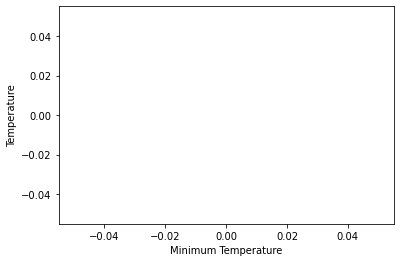

In [31]:
plt.scatter(weth.mintempC, weth.tempC)
plt.xlabel("Minimum Temperature")
plt.ylabel("Temperature")
plt.show()